<p dir="rtl" style="font-family:B Nazanin;">
    <b>
    علیرضا آقابابایی<br>
    تمرین دوم ترم پنجم - دوره اول استادی هوش مصنوعی
    </b>
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import re
import plotly.express as px 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Read the data

In [2]:
df = pd.read_csv('./used_cars.csv')
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

# Preprocessing

In [3]:
df.shape

(8128, 13)

دیتا فریم دارای 8128 رکورد و 13 ستون است.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


## Duplicate values

In [5]:
df.duplicated().sum()

1202

در این دیتافریم 1202 سطر تکراری وجود دارد. اما با توجه به اینکه این احتمال وجود دارد که این اطلاعات تکراری مربوط به خودروهای مشابه به یکدیگر باشد و هیچ ستون متمایزکننده‌ای برای  آن نداریم، از حذف داده‌های تکراری خودداری می‌کنیم. 

## Checking the types and values of each column and Data Visualization

### `name`

ستون name یک ستون متنی است که نام خودروها را نشان می‌دهد. با توجه به اینکه این ستون اطلاعات مفیدی جهت محاسبات و آموزش در اختیار ما قرار نمی‌دهد، آن را حذف می‌کنیم.

In [6]:
df.drop('name', axis=1, inplace=True)
df.head()

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   
3  2010         225000     127000  Diesel  Individual       Manual   
4  2007         130000     120000  Petrol  Individual       Manual   

          owner     mileage   engine   max_power                    torque  \
0   First Owner   23.4 kmpl  1248 CC      74 bhp            190Nm@ 2000rpm   
1  Second Owner  21.14 kmpl  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm   
2   Third Owner   17.7 kmpl  1497 CC      78 bhp     12.7@ 2,700(kgm@ rpm)   
3   First Owner   23.0 kmpl  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm   
4   First Owner   16.1 kmpl  1298 CC    88.2 bhp     11.5@ 4,500(kgm@ rpm)   

   seats  
0    5.0  
1    5.0  
2    5.0  
3    5.0  
4    5.0

### `year`

ستون year سال تولید را نشان می‌دهد که باید داده‌های عددی داشته باشد. این ستون را از نظر نوع داده و همچنین داده NaN بررسی می‌کنیم.

In [7]:
df['year'].dtype

dtype('int64')

In [8]:
df['year'].isnull().sum()

0

پس هیچ داده خالی وجود ندارد و همه داده‌ها از نوع عددی (int64) هستند. با توجه به این که عدد سال تولید اهمیت ندارد بلکه سن خودرو در تعیین قیمت آن نقش مهمی دارد،  ستون جدیدی به نام age ایجاد می‌کنیم و ستون year را حذف می‌کنیم.

In [9]:
from datetime import datetime
df['age'] = datetime.today().year - df['year']

In [10]:
df.drop('year', axis=1, inplace=True)
df.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0         450000     145500  Diesel  Individual       Manual   First Owner   
1         370000     120000  Diesel  Individual       Manual  Second Owner   
2         158000     140000  Petrol  Individual       Manual   Third Owner   
3         225000     127000  Diesel  Individual       Manual   First Owner   
4         130000     120000  Petrol  Individual       Manual   First Owner   

      mileage   engine   max_power                    torque  seats  age  
0   23.4 kmpl  1248 CC      74 bhp            190Nm@ 2000rpm    5.0   10  
1  21.14 kmpl  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm    5.0   10  
2   17.7 kmpl  1497 CC      78 bhp     12.7@ 2,700(kgm@ rpm)    5.0   18  
3   23.0 kmpl  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm    5.0   14  
4   16.1 kmpl  1298 CC    88.2 bhp     11.5@ 4,500(kgm@ rpm)    5.0   17

در قسمت زیر توزیع داده‌ها بر حسب سن خودروهای کارکرده را می‌بینیم.

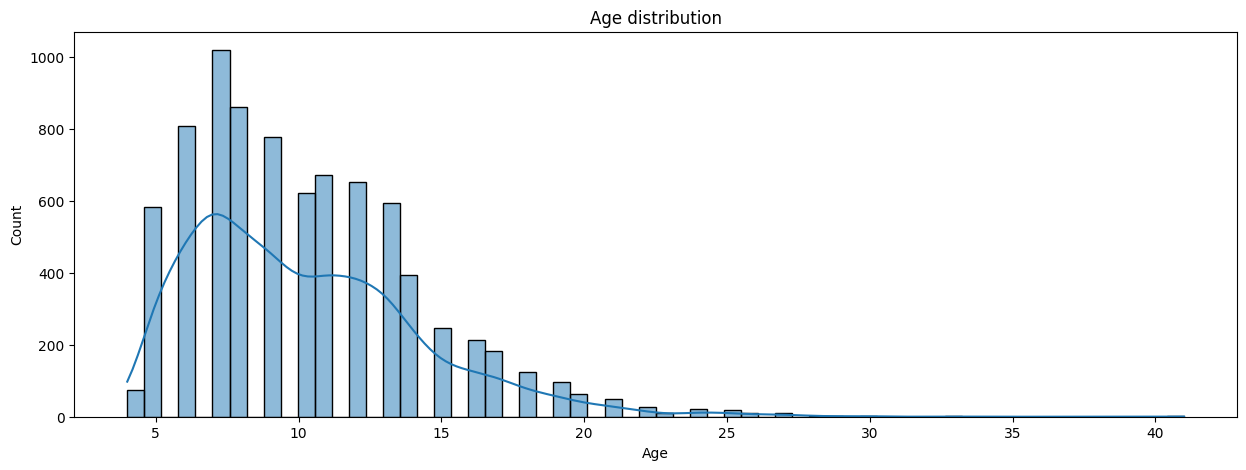

In [11]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='age', kde=True)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

همان طور که مشاهده می‌شود بیشترین توزیع داده‌ها مربوط به خودروهایی است که بین 5 تا 15 سال کار کرده‌اند.  در نمودار زیر ارتباط کلی سن خودرو با قیمت فروش آن را مشاهده می‌کنیم.

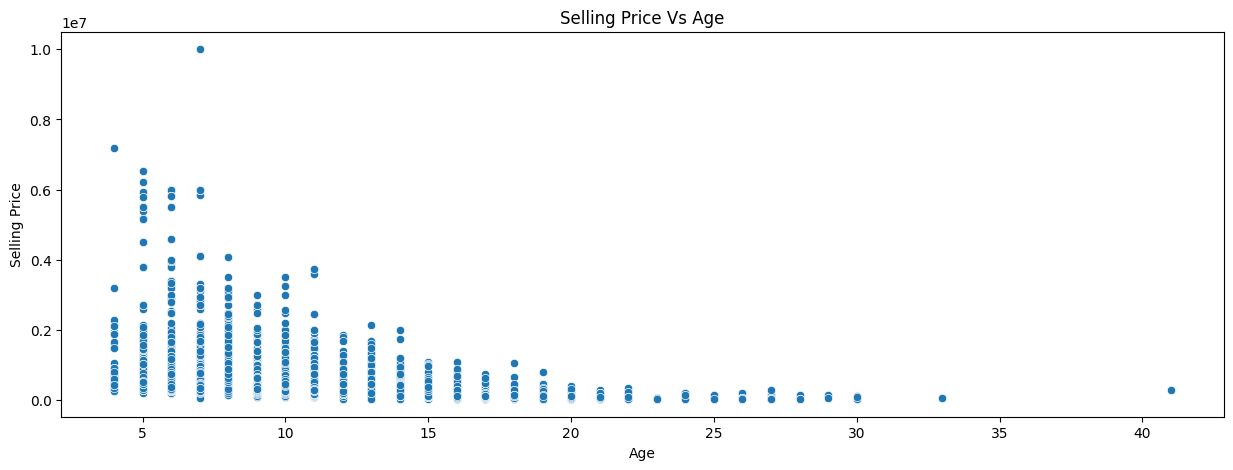

In [12]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='age', y='selling_price')
plt.title('Selling Price Vs Age')
plt.xlabel('Age')
plt.ylabel('Selling Price')
plt.show()

همان طور که مشاهده می‌شود با افزایش سن خودرو، قیمت آن کاهش می‌یابد.

### `selling_price`

ستون selling_price قیمت فروش خودرو را نشان می‌دهد که باید از نوع عددی باشد.

In [13]:
df['selling_price'].dtype

dtype('int64')

In [14]:
df['selling_price'].isnull().sum()

0

توزیع قیمت‌های خودروهای مختلف به صورت زیر است.

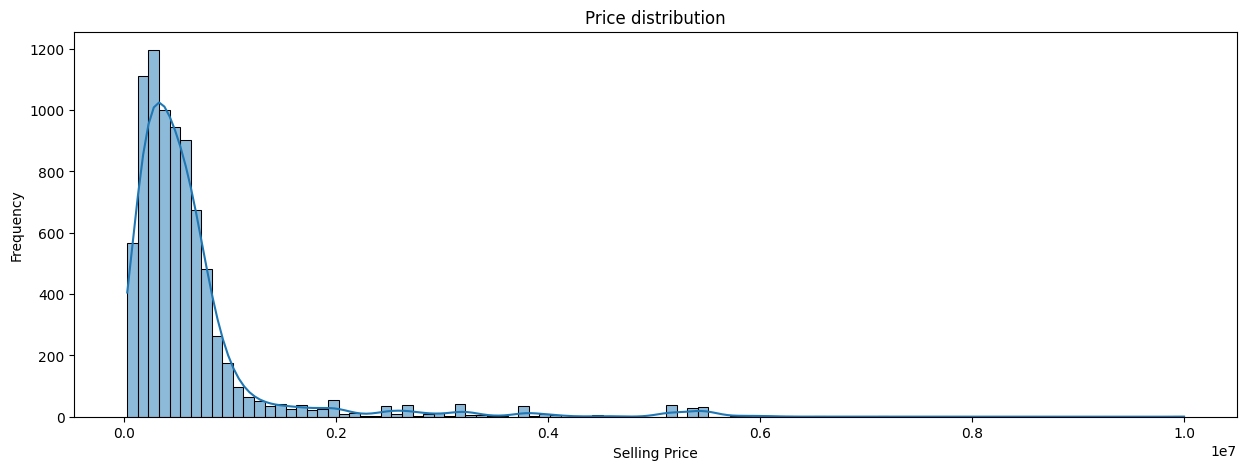

In [15]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='selling_price', kde=True, bins=100)
plt.title('Price distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

### `km_driven`

ستون km_driven میزان کیلومتر طی‌شده خودرو را نشان می‌دهد که باید از نوع عددی باشد.

In [16]:
df['km_driven'].dtype

dtype('int64')

In [17]:
df['km_driven'].isnull().sum()

0

ارتباط میزان کارکرد کیلومتر خودرو با قیمت آن را در نمودار زیر مشاهده می‌کنیم.

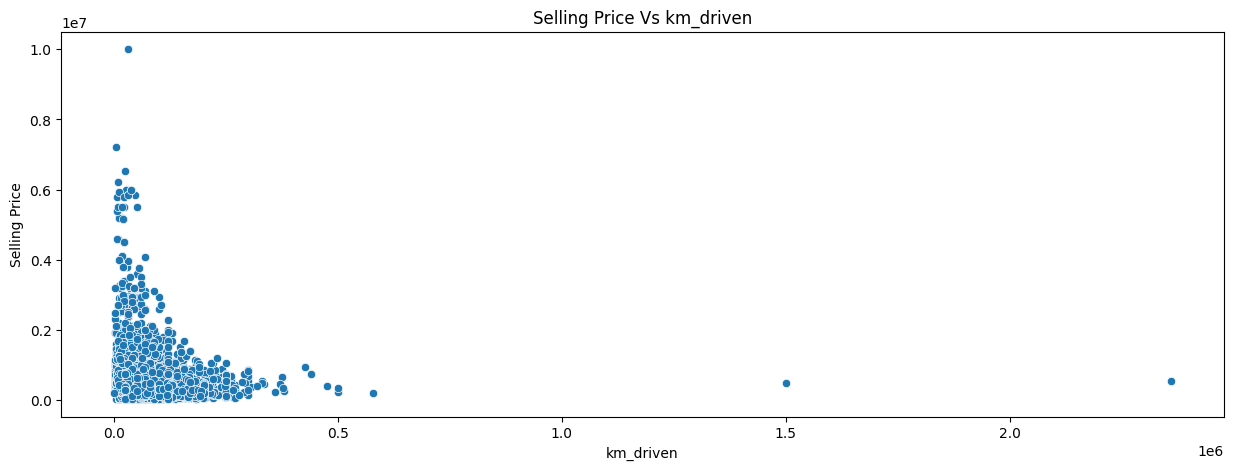

In [18]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='km_driven', y='selling_price')
plt.title('Selling Price Vs km_driven')
plt.xlabel('km_driven')
plt.ylabel('Selling Price')
plt.show()

به طور کلی هر چه میزان کارکرد خودرو افزایش یابد، قیمت آن کاهش می‌یابد.

### `fuel`

ستون fuel نوع سوخت خودرو را نشان می‌دهد. 

In [19]:
df['fuel'].dtype

dtype('O')

In [20]:
df['fuel'].isnull().sum()

0

In [21]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

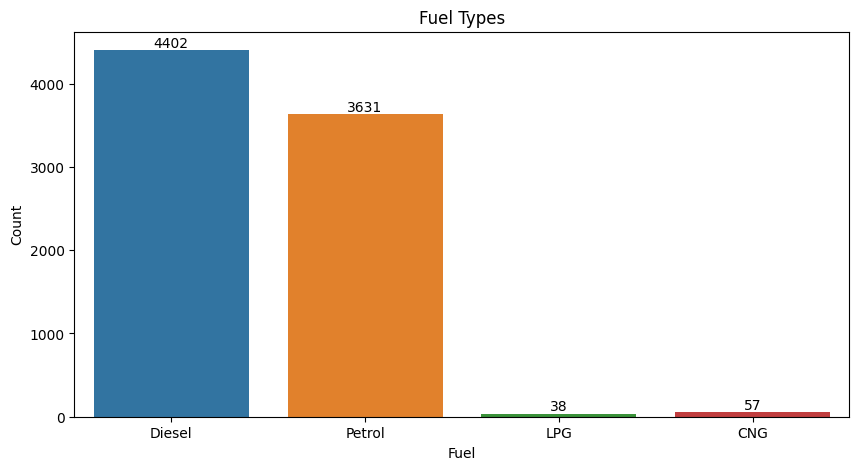

In [22]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='fuel')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Fuel Types')
plt.xlabel('Fuel')
plt.ylabel('Count')
plt.show()

ستون fuel با توجه به این که جزء داده‌های دسته‌ای است را به کمک One-Hot Encoder کدگذاری می‌کنیم.

In [23]:
df = pd.get_dummies(df, columns=['fuel'])
df.head()

selling_price  km_driven seller_type transmission         owner  \
0         450000     145500  Individual       Manual   First Owner   
1         370000     120000  Individual       Manual  Second Owner   
2         158000     140000  Individual       Manual   Third Owner   
3         225000     127000  Individual       Manual   First Owner   
4         130000     120000  Individual       Manual   First Owner   

      mileage   engine   max_power                    torque  seats  age  \
0   23.4 kmpl  1248 CC      74 bhp            190Nm@ 2000rpm    5.0   10   
1  21.14 kmpl  1498 CC  103.52 bhp       250Nm@ 1500-2500rpm    5.0   10   
2   17.7 kmpl  1497 CC      78 bhp     12.7@ 2,700(kgm@ rpm)    5.0   18   
3   23.0 kmpl  1396 CC      90 bhp  22.4 kgm at 1750-2750rpm    5.0   14   
4   16.1 kmpl  1298 CC    88.2 bhp     11.5@ 4,500(kgm@ rpm)    5.0   17   

   fuel_CNG  fuel_Diesel  fuel_LPG  fuel_Petrol  
0         0            1         0            0  
1         0            1         0            0  
2         0            0         0            1  
3         0            1         0            0  
4         0            0         0            1

### `seller_type`

ستون seller_type نوع فروشنده را مشخص می‌کند  که با توجه به اینکه جزء داده‌های دسته‌ای است با روش One-Hot Encoding کدگذاری می‌کنیم.

In [24]:
df['seller_type'].dtype

dtype('O')

In [25]:
df['seller_type'].isnull().sum()

0

In [26]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

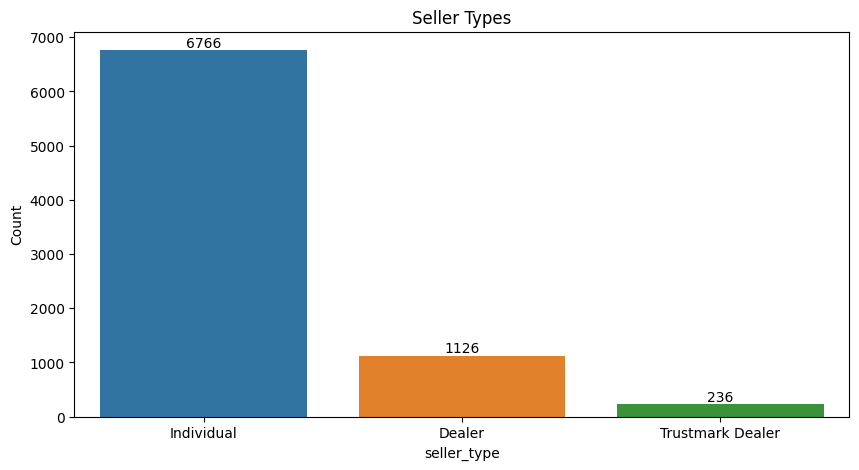

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='seller_type')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Seller Types')
plt.xlabel('seller_type')
plt.ylabel('Count')
plt.show()

In [28]:
df = pd.get_dummies(df, columns=['seller_type'])
df.head()

selling_price  km_driven transmission         owner     mileage   engine  \
0         450000     145500       Manual   First Owner   23.4 kmpl  1248 CC   
1         370000     120000       Manual  Second Owner  21.14 kmpl  1498 CC   
2         158000     140000       Manual   Third Owner   17.7 kmpl  1497 CC   
3         225000     127000       Manual   First Owner   23.0 kmpl  1396 CC   
4         130000     120000       Manual   First Owner   16.1 kmpl  1298 CC   

    max_power                    torque  seats  age  fuel_CNG  fuel_Diesel  \
0      74 bhp            190Nm@ 2000rpm    5.0   10         0            1   
1  103.52 bhp       250Nm@ 1500-2500rpm    5.0   10         0            1   
2      78 bhp     12.7@ 2,700(kgm@ rpm)    5.0   18         0            0   
3      90 bhp  22.4 kgm at 1750-2750rpm    5.0   14         0            1   
4    88.2 bhp     11.5@ 4,500(kgm@ rpm)    5.0   17         0            0   

   fuel_LPG  fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
0         0            0                   0                       1   
1         0            0                   0                       1   
2         0            1                   0                       1   
3         0            0                   0                       1   
4         0            1                   0                       1   

   seller_type_Trustmark Dealer  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0

### `transmission`

ستون transmission  نوع دنده خودرو را نشان می‌دهد که دستی است یا اتوماتیک که چون نوع داده از نوع دسته‌ای است با One-Hot Encoding آن را کدگذاری می‌کنیم.

In [29]:
df['transmission'].dtype

dtype('O')

In [30]:
df['transmission'].isnull().sum()

0

In [31]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

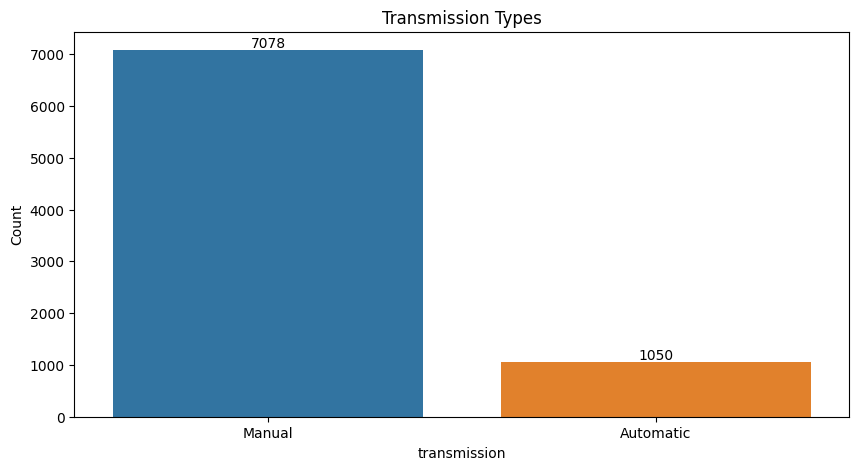

In [32]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='transmission')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Transmission Types')
plt.xlabel('transmission')
plt.ylabel('Count')
plt.show()

In [33]:
df = pd.get_dummies(df, columns=['transmission'])
df.head()

selling_price  km_driven         owner     mileage   engine   max_power  \
0         450000     145500   First Owner   23.4 kmpl  1248 CC      74 bhp   
1         370000     120000  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2         158000     140000   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3         225000     127000   First Owner   23.0 kmpl  1396 CC      90 bhp   
4         130000     120000   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  age  fuel_CNG  fuel_Diesel  fuel_LPG  \
0            190Nm@ 2000rpm    5.0   10         0            1         0   
1       250Nm@ 1500-2500rpm    5.0   10         0            1         0   
2     12.7@ 2,700(kgm@ rpm)    5.0   18         0            0         0   
3  22.4 kgm at 1750-2750rpm    5.0   14         0            1         0   
4     11.5@ 4,500(kgm@ rpm)    5.0   17         0            0         0   

   fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
0            0                   0                       1   
1            0                   0                       1   
2            1                   0                       1   
3            0                   0                       1   
4            1                   0                       1   

   seller_type_Trustmark Dealer  transmission_Automatic  transmission_Manual  
0                             0                       0                    1  
1                             0                       0                    1  
2                             0                       0                    1  
3                             0                       0                    1  
4                             0                       0                    1

### `owner`

ستون owner نشان می‌دهد که فروشنده خودرو چندمین دارنده این خودرو بوده که به نوعی میزان کارکرد خودرو را نیز شاید نشان دهد.

In [34]:
df['owner'].dtype

dtype('O')

In [35]:
df['owner'].isnull().sum()

0

In [36]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

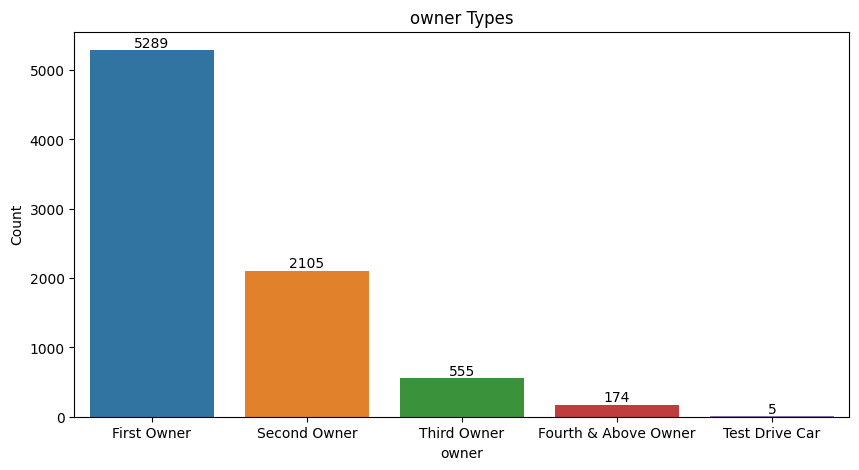

In [37]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='owner')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('owner Types')
plt.xlabel('owner')
plt.ylabel('Count')
plt.show()

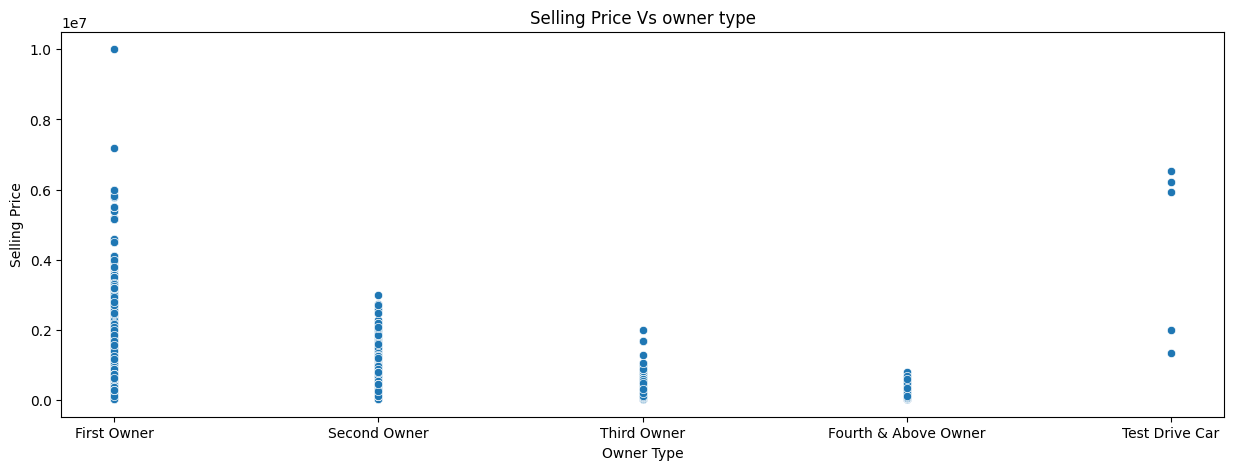

In [38]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='owner', y='selling_price')
plt.title('Selling Price Vs owner type')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.show()

همان طور که مشاهده می‌شود خودروهایی که اولین صاحب آن، آن را فروخته‌اند، قیمت بالاتری نیز خواهد داشت. با توجه به ماهیت این ستون، برای کدگذاری داده‌ها از روشی مشابه با Label Encoding باید استفاده کنیم ولی چون روش Label Encoding برای کدگذاری داده‌ها با توجه به ترتیب وقوع داده‌ها در دیتافریم شماره‌گذاری را انجام می‌دهد ولی ما می‌خواهیم که مثلا حتما first owner عدد یک باشد و second owner عدد دو باشد و ...، از روش زیر استفاده می‌کنیم:

In [39]:
owner_type_map = {'Test Drive Car': 0, 'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}
df['owner'] = df['owner'].apply(lambda x: owner_type_map[x])
df.head()

selling_price  km_driven  owner     mileage   engine   max_power  \
0         450000     145500      1   23.4 kmpl  1248 CC      74 bhp   
1         370000     120000      2  21.14 kmpl  1498 CC  103.52 bhp   
2         158000     140000      3   17.7 kmpl  1497 CC      78 bhp   
3         225000     127000      1   23.0 kmpl  1396 CC      90 bhp   
4         130000     120000      1   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  age  fuel_CNG  fuel_Diesel  fuel_LPG  \
0            190Nm@ 2000rpm    5.0   10         0            1         0   
1       250Nm@ 1500-2500rpm    5.0   10         0            1         0   
2     12.7@ 2,700(kgm@ rpm)    5.0   18         0            0         0   
3  22.4 kgm at 1750-2750rpm    5.0   14         0            1         0   
4     11.5@ 4,500(kgm@ rpm)    5.0   17         0            0         0   

   fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
0            0                   0                       1   
1            0                   0                       1   
2            1                   0                       1   
3            0                   0                       1   
4            1                   0                       1   

   seller_type_Trustmark Dealer  transmission_Automatic  transmission_Manual  
0                             0                       0                    1  
1                             0                       0                    1  
2                             0                       0                    1  
3                             0                       0                    1  
4                             0                       0                    1

### `mileage`

ستون mileage میزان مصرف سوخت را نشان می‌دهد یا به عبارت دیگر میزان کیلومتری که خودرو به ازای مصرف یک لیتر سوخت حرکت می‌کند را مشخص می‌کند. 

In [40]:
df['mileage'].dtype

dtype('O')

با توجه به داده‌ها، واحد kmpl را از انتهای همه داده‌ها حذف می‌کنیم تا بتوانیم آن را به عدد تبدیل کنیم.  با توجه به اینکه تعداد کمی از داده‌ها واحدی به جزkmpl دارند، این داده‌ها را به عنوان نویز در نظر گرفته و حذف می‌کنیم. 

In [41]:
df['mileage'] = df['mileage'].str.extract('(\d+\.?\d*) kmpl')
df.head()

selling_price  km_driven  owner mileage   engine   max_power  \
0         450000     145500      1    23.4  1248 CC      74 bhp   
1         370000     120000      2   21.14  1498 CC  103.52 bhp   
2         158000     140000      3    17.7  1497 CC      78 bhp   
3         225000     127000      1    23.0  1396 CC      90 bhp   
4         130000     120000      1    16.1  1298 CC    88.2 bhp   

                     torque  seats  age  fuel_CNG  fuel_Diesel  fuel_LPG  \
0            190Nm@ 2000rpm    5.0   10         0            1         0   
1       250Nm@ 1500-2500rpm    5.0   10         0            1         0   
2     12.7@ 2,700(kgm@ rpm)    5.0   18         0            0         0   
3  22.4 kgm at 1750-2750rpm    5.0   14         0            1         0   
4     11.5@ 4,500(kgm@ rpm)    5.0   17         0            0         0   

   fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
0            0                   0                       1   
1            0                   0                       1   
2            1                   0                       1   
3            0                   0                       1   
4            1                   0                       1   

   seller_type_Trustmark Dealer  transmission_Automatic  transmission_Manual  
0                             0                       0                    1  
1                             0                       0                    1  
2                             0                       0                    1  
3                             0                       0                    1  
4                             0                       0                    1

نوع داده‌ها را از Object به عدد اعشاری تبدیل می‌کنیم.

In [42]:
df['mileage'] = df['mileage'].astype(float)

In [43]:
df['mileage'].isnull().sum()

309

داده‌های خالی را با میانگین داده‌ها پر می‌کنیم.

In [44]:
df['mileage'].fillna(df['mileage'].mean(), inplace=True)
df['mileage'].isnull().sum()

0

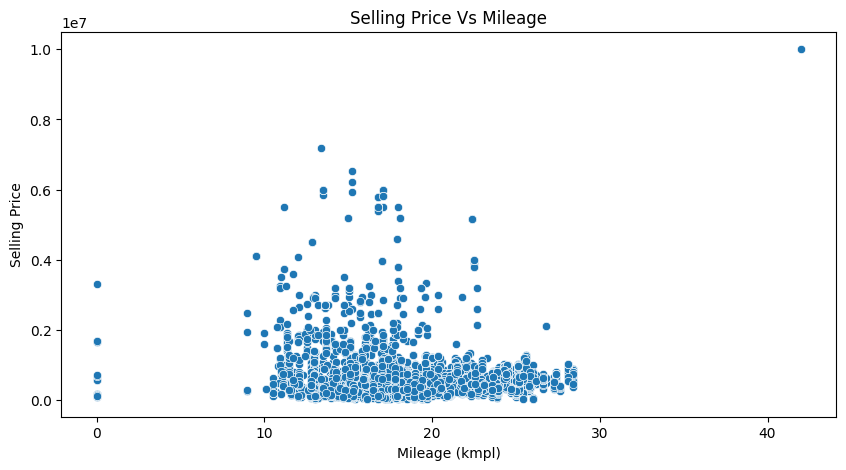

In [45]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='mileage', y='selling_price')
plt.title('Selling Price Vs Mileage')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Selling Price')
plt.show()

### `engine`

ستون engine حجم موتور خودرو را نشان می‌دهد. در ابتدا واحد CC را از انتهای داده‌های این ستون حذف می‌کنیم و آن را به عدد تبدیل می‌کنیم.

In [46]:
df['engine'].dtype

dtype('O')

In [47]:
df['engine'].isnull().sum()

221

In [48]:
df['engine'].str.match(r'\d+ CC').all()

True

In [49]:
df['engine'] = df['engine'].str.extract('(\d+) CC')

In [50]:
df['engine'].isnull().sum()

221

داده‌های خالی را با میانگین پر می‌کنیم.

In [51]:
df['engine'] = pd.to_numeric(df['engine'], errors='coerce')
df['engine'].fillna(df['engine'].mean(), inplace=True)

In [52]:
df.head()

selling_price  km_driven  owner  mileage  engine   max_power  \
0         450000     145500      1    23.40  1248.0      74 bhp   
1         370000     120000      2    21.14  1498.0  103.52 bhp   
2         158000     140000      3    17.70  1497.0      78 bhp   
3         225000     127000      1    23.00  1396.0      90 bhp   
4         130000     120000      1    16.10  1298.0    88.2 bhp   

                     torque  seats  age  fuel_CNG  fuel_Diesel  fuel_LPG  \
0            190Nm@ 2000rpm    5.0   10         0            1         0   
1       250Nm@ 1500-2500rpm    5.0   10         0            1         0   
2     12.7@ 2,700(kgm@ rpm)    5.0   18         0            0         0   
3  22.4 kgm at 1750-2750rpm    5.0   14         0            1         0   
4     11.5@ 4,500(kgm@ rpm)    5.0   17         0            0         0   

   fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
0            0                   0                       1   
1            0                   0                       1   
2            1                   0                       1   
3            0                   0                       1   
4            1                   0                       1   

   seller_type_Trustmark Dealer  transmission_Automatic  transmission_Manual  
0                             0                       0                    1  
1                             0                       0                    1  
2                             0                       0                    1  
3                             0                       0                    1  
4                             0                       0                    1

<Axes: xlabel='engine', ylabel='selling_price'>

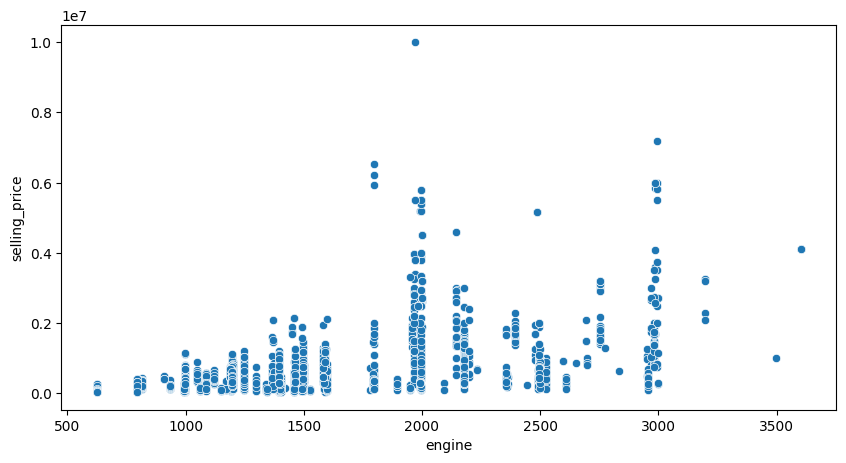

In [53]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='engine', y='selling_price')

همان طور که مشاهده می‌شود، با افزایش حجم موتور، قیمت خودرو نیز افزایش می‌یابد.

### `max_power`

ستون max_power میزان توان خودرو بر حسب اسب بخار را نشان می‌دهد.

In [54]:
df['max_power'].dtype

dtype('O')

In [55]:
df['max_power'].str.match(r'\d+\.?\d* bhp').all()

False

In [56]:
df[df['max_power'].str.match(r'\d+\.?\d* bhp') == False]

selling_price  km_driven  owner    mileage       engine max_power  \
575          204999      97500      1  19.390375  1458.625016         0   
576          204999      97500      1  19.390375  1458.625016         0   
1442         589000      41232      1  19.390375  1458.625016         0   
1443         589000      41232      1  19.390375  1458.625016         0   
2549         240000      70000      1  19.390375  1458.625016         0   
2550         240000      70000      1  19.390375  1458.625016         0   
4933          80000     100000      2  19.390375   796.000000       bhp   

     torque  seats  age  fuel_CNG  fuel_Diesel  fuel_LPG  fuel_Petrol  \
575     NaN    NaN   13         0            0         0            1   
576     NaN    NaN   13         0            0         0            1   
1442    NaN    NaN    7         0            1         0            0   
1443    NaN    NaN    7         0            1         0            0   
2549    NaN    NaN   12         0            1         0            0   
2550    NaN    NaN   12         0            1         0            0   
4933    NaN    8.0   24         1            0         0            0   

      seller_type_Dealer  seller_type_Individual  \
575                    0                       1   
576                    0                       1   
1442                   1                       0   
1443                   1                       0   
2549                   0                       1   
2550                   0                       1   
4933                   0                       1   

      seller_type_Trustmark Dealer  transmission_Automatic  \
575                              0                       0   
576                              0                       0   
1442                             0                       0   
1443                             0                       0   
2549                             0                       0   
2550                             0                       0   
4933                             0                       0   

      transmission_Manual  
575                     1  
576                     1  
1442                    1  
1443                    1  
2549                    1  
2550                    1  
4933                    1

مطابق با نتیجه به دست آمده، تعدادی از سطرها با الگوی اصلی داده‌ها هماهنگ نیست و داده‌ها به درستی وارد نشده‌اند که این سطرها را ابتدا به NaN تبدیل می‌کنیم و سپس با میانگین پر می‌نماییم.

In [57]:
df['max_power'] = df['max_power'].str.extract('(\d+\.?\d*) bhp')
df['max_power'] = pd.to_numeric(df['max_power'])
df['max_power'].fillna(df['max_power'].mean(), inplace=True)

In [58]:
df.head()

selling_price  km_driven  owner  mileage  engine  max_power  \
0         450000     145500      1    23.40  1248.0      74.00   
1         370000     120000      2    21.14  1498.0     103.52   
2         158000     140000      3    17.70  1497.0      78.00   
3         225000     127000      1    23.00  1396.0      90.00   
4         130000     120000      1    16.10  1298.0      88.20   

                     torque  seats  age  fuel_CNG  fuel_Diesel  fuel_LPG  \
0            190Nm@ 2000rpm    5.0   10         0            1         0   
1       250Nm@ 1500-2500rpm    5.0   10         0            1         0   
2     12.7@ 2,700(kgm@ rpm)    5.0   18         0            0         0   
3  22.4 kgm at 1750-2750rpm    5.0   14         0            1         0   
4     11.5@ 4,500(kgm@ rpm)    5.0   17         0            0         0   

   fuel_Petrol  seller_type_Dealer  seller_type_Individual  \
0            0                   0                       1   
1            0                   0                       1   
2            1                   0                       1   
3            0                   0                       1   
4            1                   0                       1   

   seller_type_Trustmark Dealer  transmission_Automatic  transmission_Manual  
0                             0                       0                    1  
1                             0                       0                    1  
2                             0                       0                    1  
3                             0                       0                    1  
4                             0                       0                    1

### `torque`

ستون torque میزان گشتاور خودرو را نشان می‌دهد که در بعضی از سطرها بر حسب Nm و در بعضی از سطرها بر حسب kgm است. برای تبدیل kgm به Nm باید اعداد را در 10 ضرب کنیم. برای این منظور از یک دیتافریم کمکی استفاده می‌کنیم که ابتدا اعداد را استخراج می‌کنیم و در یک ستون آن می‌ریزیم و سپس در ستون دوم مشخص می‌کنیم که بر حسب Nm است یا kgm  و متناسب با آن در این ستون ضریب 1 یا 10 را قرار می‌دهیم و سپس  این دو ستون را در هم ضرب می‌کنیم تا همه اعداد بر حسب Nm به دست آیند و در دیتافریم اصلی قرار می‌دهیم.

In [59]:
torque = df['torque'].str.extract('(\d+\.?\d*)\s*[@\w]*').astype(float)
coef = df['torque'].str.match('.*kgm', flags=re.I).apply(lambda x: 10 if x else 1).to_frame(name='coef')

In [60]:
ddf = pd.DataFrame({'torque': torque[0], 'coef': coef['coef']})
df['torque'] = ddf['torque'] * ddf['coef']
del torque, coef, ddf

In [61]:
df.head()

selling_price  km_driven  owner  mileage  engine  max_power  torque  seats  \
0         450000     145500      1    23.40  1248.0      74.00   190.0    5.0   
1         370000     120000      2    21.14  1498.0     103.52   250.0    5.0   
2         158000     140000      3    17.70  1497.0      78.00   127.0    5.0   
3         225000     127000      1    23.00  1396.0      90.00   224.0    5.0   
4         130000     120000      1    16.10  1298.0      88.20   115.0    5.0   

   age  fuel_CNG  fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Dealer  \
0   10         0            1         0            0                   0   
1   10         0            1         0            0                   0   
2   18         0            0         0            1                   0   
3   14         0            1         0            0                   0   
4   17         0            0         0            1                   0   

   seller_type_Individual  seller_type_Trustmark Dealer  \
0                       1                             0   
1                       1                             0   
2                       1                             0   
3                       1                             0   
4                       1                             0   

   transmission_Automatic  transmission_Manual  
0                       0                    1  
1                       0                    1  
2                       0                    1  
3                       0                    1  
4                       0                    1

In [62]:
df['torque'].isnull().sum()

222

In [63]:
df['torque'].dtype

dtype('float64')

In [64]:
df['torque'].fillna(df['torque'].mean(), inplace=True)

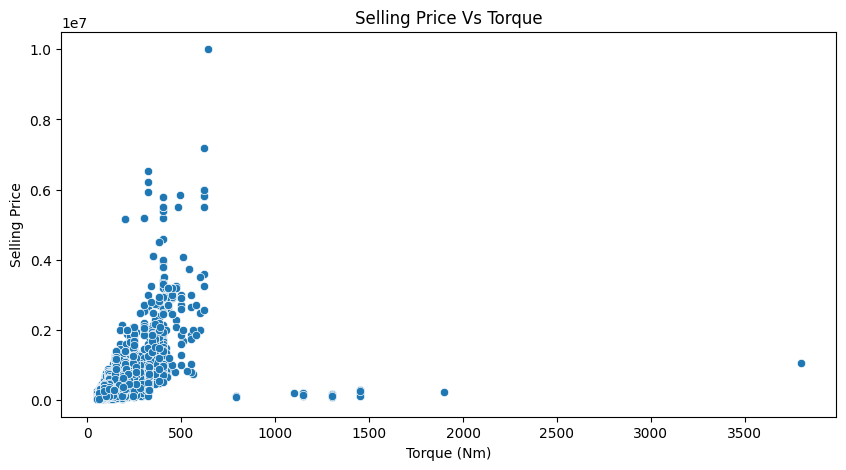

In [65]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='torque', y='selling_price')
plt.title('Selling Price Vs Torque')
plt.xlabel('Torque (Nm)')
plt.ylabel('Selling Price')
plt.show()

همان طور که مشاهده می‌شود روند تغییرات قیمت با افزایش گشتاور خودرو صعودی است.

### `seats`

ستون seats تعداد صندلی‌های خودرو را نشان می‌دهد.

In [66]:
df['seats'].dtype

dtype('float64')

In [67]:
df['seats'].isnull().sum()

221

In [68]:
df['seats'].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [69]:
df['seats'].fillna(df['seats'].mode()[0], inplace=True)

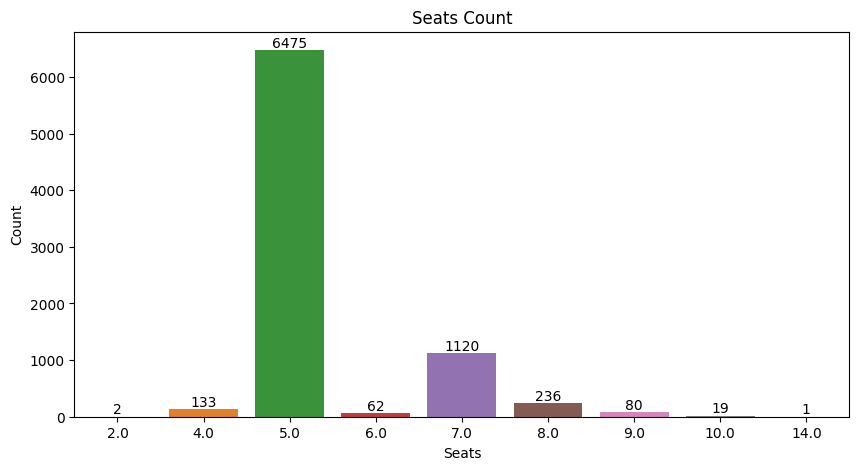

In [70]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='seats')
ax.bar_label(ax.containers[0], label_type='edge')
plt.title('Seats Count')
plt.xlabel('Seats')
plt.ylabel('Count')
plt.show()

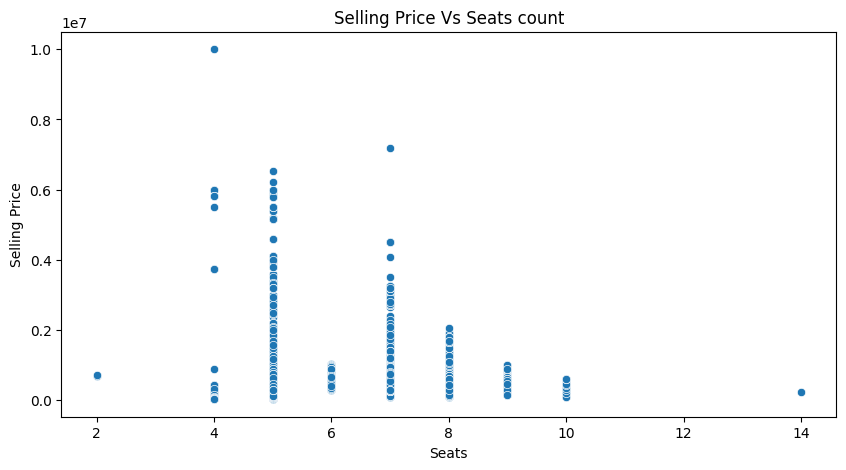

In [71]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='seats', y='selling_price')
plt.title('Selling Price Vs Seats count')
plt.xlabel('Seats')
plt.ylabel('Selling Price')
plt.show()

## Checking the outliers

In [72]:
columns = ['selling_price', 'km_driven', 'mileage', 'max_power', 'torque', 'age', 'engine']
for col in columns:
    fig = px.box(df, y=col)
    fig.show()

In [73]:
for col in columns:
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    upper_fence = q3 + 1.5 * iqr
    lower_fence = q1 - 1.5 * iqr
    df = df[(df[col] <= upper_fence) & (df[col] >= lower_fence)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6248 entries, 0 to 8127
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 6248 non-null   int64  
 1   km_driven                     6248 non-null   int64  
 2   owner                         6248 non-null   int64  
 3   mileage                       6248 non-null   float64
 4   engine                        6248 non-null   float64
 5   max_power                     6248 non-null   float64
 6   torque                        6248 non-null   float64
 7   seats                         6248 non-null   float64
 8   age                           6248 non-null   int64  
 9   fuel_CNG                      6248 non-null   uint8  
 10  fuel_Diesel                   6248 non-null   uint8  
 11  fuel_LPG                      6248 non-null   uint8  
 12  fuel_Petrol                   6248 non-null   uint8  
 13  sel

## Data Scaling

In [74]:
columns = df.columns
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df)
df.columns = columns
df.head()

selling_price  km_driven     owner   mileage    engine  max_power  \
0       0.067532   2.108156 -0.636444  0.873591  0.031102  -0.333732   
1      -0.265135   1.448899  0.777675  0.157561  1.163442   1.262055   
2      -1.146703   1.965963  2.191793 -0.932326  1.158913  -0.117501   
3      -0.868094   1.629872 -0.636444  0.746860  0.701447   0.531193   
4      -1.263136   1.448899 -0.636444 -1.439250  0.257570   0.433889   

     torque     seats       age  fuel_CNG  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0  0.781547 -0.236132 -0.007238 -0.094239     1.101831 -0.075056    -1.070329   
1  1.876748 -0.236132 -0.007238 -0.094239     1.101831 -0.075056    -1.070329   
2 -0.368414 -0.236132  2.120956 -0.094239    -0.907580 -0.075056     0.934292   
3  1.402161 -0.236132  1.056859 -0.094239     1.101831 -0.075056    -1.070329   
4 -0.587454 -0.236132  1.854931 -0.094239    -0.907580 -0.075056     0.934292   

   seller_type_Dealer  seller_type_Individual  seller_type_Trustmark Dealer  \
0           -0.357488                0.404888                      -0.16825   
1           -0.357488                0.404888                      -0.16825   
2           -0.357488                0.404888                      -0.16825   
3           -0.357488                0.404888                      -0.16825   
4           -0.357488                0.404888                      -0.16825   

   transmission_Automatic  transmission_Manual  
0               -0.278924             0.278924  
1               -0.278924             0.278924  
2               -0.278924             0.278924  
3               -0.278924             0.278924  
4               -0.278924             0.278924

In [75]:
df.reset_index(inplace=True, drop=True)

# Train and Test

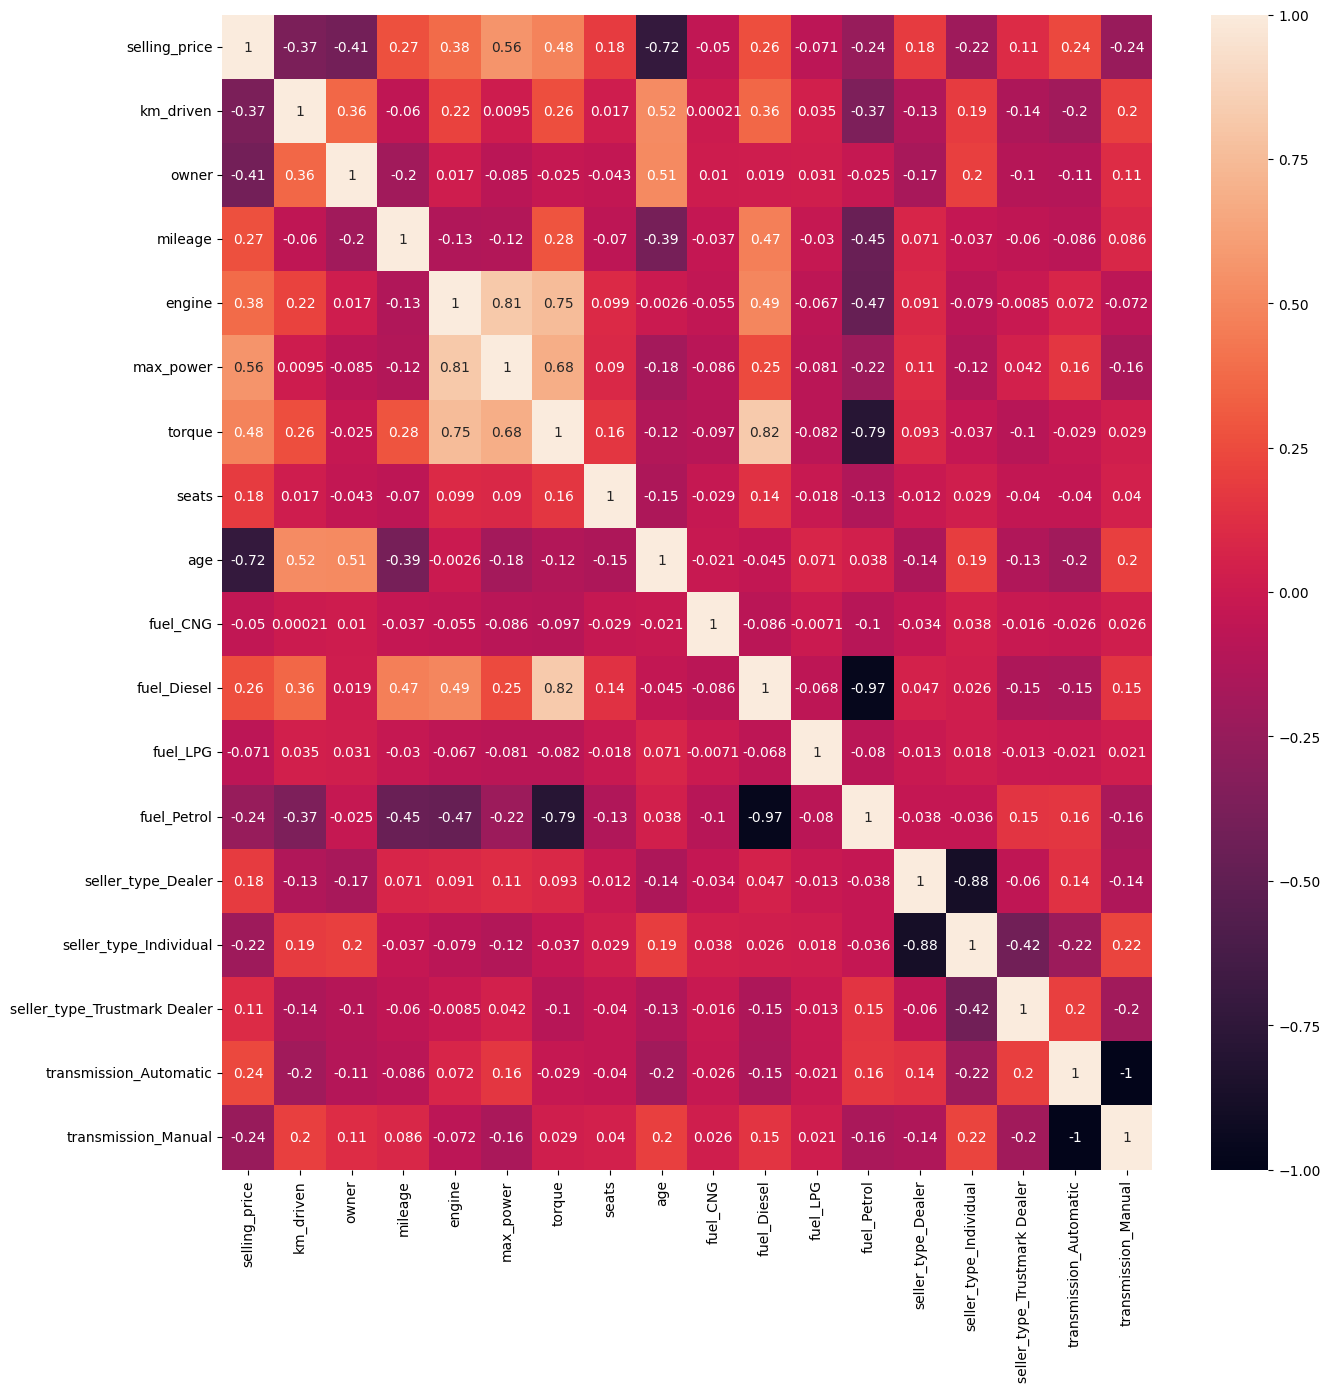

In [76]:
corr = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(data=corr, annot=True)
plt.show()

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from skopt import BayesSearchCV

## Single Variable Linear Regression

In [78]:
X = df[['age']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

slr_model = LinearRegression()
slr_model.fit(X_train, y_train)

y_pred = slr_model.predict(X_test)

slr_r2 = r2_score(y_test, y_pred)
slr_mse = mean_squared_error(y_test, y_pred)

print(f"SLR R2 = {slr_r2}")
print(f"SLR MSE = {slr_mse}")

SLR R2 = 0.5446616645255573
SLR MSE = 0.4097171981282305


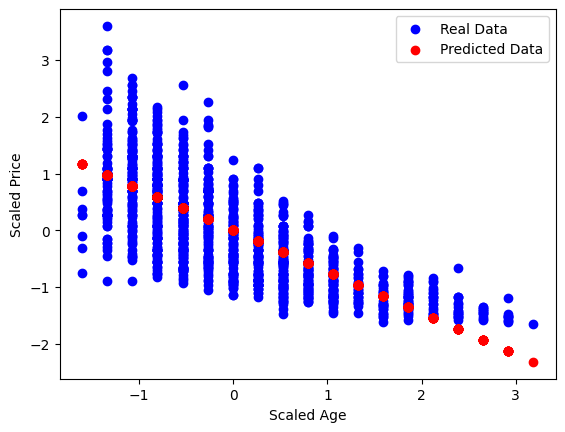

In [79]:
plt.figure()
plt.scatter(x=X_test, y=y_test, label='Real Data', color='blue')
plt.scatter(x=X_test, y=y_pred, label='Predicted Data', color='red')
plt.legend()
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Price')
plt.show()

## Multi-Variable Linear Regression

In [80]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_pred = mlr_model.predict(X_test)

mlr_r2 = r2_score(y_test, y_pred)
mlr_mse = mean_squared_error(y_test, y_pred)

print(f"MLR R2 = {mlr_r2}")
print(f"MLR MSE = {mlr_mse}")

MLR R2 = 0.767183556038563
MLR MSE = 0.2094901607585205


## Polynomial Regression

In [81]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pr_model = LinearRegression()
pf = PolynomialFeatures(degree=2)

X_train_poly = pf.fit_transform(X_train)
X_test_poly = pf.fit_transform(X_test)

pr_model.fit(X_train_poly, y_train)

y_pred = pr_model.predict(X_test_poly)

pr_r2 = r2_score(y_test, y_pred)
pr_mse = mean_squared_error(y_test, y_pred)

print(f"PR R2 = {pr_r2}")
print(f"PR MSE = {pr_mse}")

PR R2 = 0.8487383474736228
PR MSE = 0.1361064852858886


## Ridge Regression with $\alpha = 0.1$

In [82]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ridge_model = Ridge(alpha=0.1)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

ridge_r2 = r2_score(y_test, y_pred)
ridge_mse = mean_squared_error(y_test, y_pred)

print(f"Ridge R2 = {ridge_r2}")
print(f"Ridge MSE = {ridge_mse}")

Ridge R2 = 0.7671968486576611
Ridge MSE = 0.209478199949978


## Hyperparameter Tuning for Ridge Regression

#### Grid Search

In [83]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Ridge()
params = {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='r2',
    cv=3
)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")

Best Parameters: {'alpha': 0.9}
Best R2 Score: 0.7523448574204812


#### Random Search

In [84]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Ridge()
params = {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    scoring='r2',
    cv=3
)

random_search.fit(X_train, y_train)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best R2 Score: {random_search.best_score_}")

Best Parameters: {'alpha': 0.9}
Best R2 Score: 0.7523448574204812


#### Bayesian Optimization

In [85]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Ridge()
params = {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=params,
    scoring='r2',
    cv=3,
    n_iter=20
)

bayes_search.fit(X_train, y_train)
print(f"Best Parameters: {bayes_search.best_params_}")
print(f"Best R2 Score: {bayes_search.best_score_}")

Best Parameters: OrderedDict([('alpha', 0.9)])
Best R2 Score: 0.7523448574204812


#### Ridge Regression with Tuned alpha ($\alpha = 0.9$)

In [86]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ridge_model = Ridge(alpha=0.9)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

ridge_r2 = r2_score(y_test, y_pred)
ridge_mse = mean_squared_error(y_test, y_pred)

print(f"Ridge R2 = {ridge_r2}")
print(f"Ridge MSE = {ridge_mse}")

Ridge R2 = 0.7671986348226896
Ridge MSE = 0.20947659274392078


## Lasso Regression with $\alpha = 0.3$

In [87]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lasso_model = Lasso(alpha=0.3)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

lasso_r2 = r2_score(y_test, y_pred)
lasso_mse = mean_squared_error(y_test, y_pred)

print(f"Lasso R2 = {lasso_r2}")
print(f"Lasso MSE = {lasso_mse}")

Lasso R2 = 0.5870706574379134
Lasso MSE = 0.3715572357490782


## Hyperparameter Tuning for Lasso Regression

#### Grid Search

In [88]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Lasso()
params = {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='r2',
    cv=3
)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")

Best Parameters: {'alpha': 0.001}
Best R2 Score: 0.7523614168290438


#### Random Search

In [89]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Lasso()
params = {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    scoring='r2',
    cv=3
)

random_search.fit(X_train, y_train)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best R2 Score: {random_search.best_score_}")

Best Parameters: {'alpha': 0.001}
Best R2 Score: 0.7523614168290438


#### Bayesian Optimization

In [90]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Lasso()
params = {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=params,
    scoring='r2',
    cv=3,
    n_iter=20
)

bayes_search.fit(X_train, y_train)
print(f"Best Parameters: {bayes_search.best_params_}")
print(f"Best R2 Score: {bayes_search.best_score_}")

Best Parameters: OrderedDict([('alpha', 0.001)])
Best R2 Score: 0.7523614168290438


#### Lasso Regression with Tuned alpha ($\alpha = 0.001$)

In [91]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lasso_model = Lasso(alpha=0.001)

lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

lasso_r2 = r2_score(y_test, y_pred)
lasso_mse = mean_squared_error(y_test, y_pred)

print(f"Lasso R2 = {lasso_r2}")
print(f"Lasso MSE = {lasso_mse}")

Lasso R2 = 0.7672484056098954
Lasso MSE = 0.20943180857818317


## Elastic Net Regression with $\alpha = 0.1$ and $l1\_ratio=0.3$

In [92]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.3)

elastic_model.fit(X_train, y_train)

y_pred = elastic_model.predict(X_test)

elastic_r2 = r2_score(y_test, y_pred)
elastic_mse = mean_squared_error(y_test, y_pred)

print(f"Elastic R2 = {elastic_r2}")
print(f"Elastic MSE = {elastic_mse}")

Elastic R2 = 0.7606893643415288
Elastic MSE = 0.21533368812909442


## Hyperparameter Tuning for Elastic Net Regression

#### Grid Search

In [93]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = ElasticNet()
params = {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
          'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 , 0.9]}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='r2',
    cv=3
)

grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")

Best Parameters: {'alpha': 0.001, 'l1_ratio': 0.7}
Best R2 Score: 0.752364147959311


#### Random Search

In [94]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = ElasticNet()
params = {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
          'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 , 0.9]}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    scoring='r2',
    cv=3
)

random_search.fit(X_train, y_train)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best R2 Score: {random_search.best_score_}")

Best Parameters: {'l1_ratio': 0.9, 'alpha': 0.001}
Best R2 Score: 0.7523628473528617


#### Bayesian Optimization

In [95]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = ElasticNet()
params = {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
          'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 , 0.9]}

bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=params,
    scoring='r2',
    cv=3,
    n_iter=20
)

bayes_search.fit(X_train, y_train)
print(f"Best Parameters: {bayes_search.best_params_}")
print(f"Best R2 Score: {bayes_search.best_score_}")

Best Parameters: OrderedDict([('alpha', 0.0001), ('l1_ratio', 0.9)])
Best R2 Score: 0.75234674631322


#### Elastic Net Regression with Tuned hyperparameters ($\alpha = 0.001, l1\_ratio = 0.7$)

In [96]:
X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'age', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual']]
y = df[['selling_price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

elastic_model = ElasticNet(alpha=0.001, l1_ratio=0.7)

elastic_model.fit(X_train, y_train)

y_pred = elastic_model.predict(X_test)

elastic_r2 = r2_score(y_test, y_pred)
elastic_mse = mean_squared_error(y_test, y_pred)

print(f"Elastic R2 = {elastic_r2}")
print(f"Elastic MSE = {elastic_mse}")

Elastic R2 = 0.7672423361279425
Elastic MSE = 0.20943726994821527


## Comparing Results

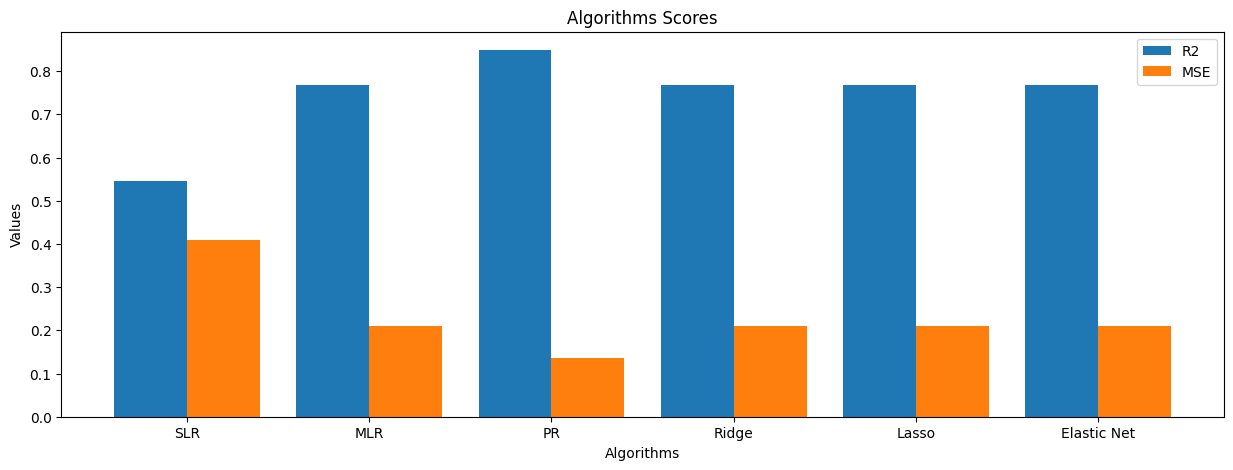

In [97]:
r2_scores = {
    'SLR': slr_r2, 'MLR': mlr_r2, 'PR': pr_r2, 'Ridge': ridge_r2, 'Lasso': lasso_r2, 'Elastic Net': elastic_r2
}
mse = {
    'SLR': slr_mse, 'MLR': mlr_mse, 'PR': pr_mse, 'Ridge': ridge_mse, 'Lasso': lasso_mse, 'Elastic Net': elastic_mse
}
plt.figure(figsize=(15, 5))
plt.bar(r2_scores.keys(), r2_scores.values(), label='R2', align='edge', width=-0.4)
plt.bar(mse.keys(), mse.values(), label='MSE', align='edge', width=0.4)
plt.legend()
plt.xlabel('Algorithms')
plt.ylabel('Values')
plt.title('Algorithms Scores')
plt.show()